# CANH TRAN Notebook - Project 07.

- Author: [Ken McTran](https://github.com/ctranimal )
- Repository: https://github.com/ctranimal/datafun-07-ml 
  
- Purpose: Use all tools learned so far for class -- Data Analysis Fundamentals, to work on a Machine Learning project: supervised learning, via simple linear regression.
- Date: Most recently updated: 8/08/25.

## Setting-Up: Import external packages 
   
#### The purpose of this section is to import external packages that I will need to execute python code subsequently

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from scipy import stats

## Part 1: Chart a Straight Line
   
#### Setting up to implement C = 5/9 * (f - 32) for conversion between Celcius (C) and Fahrenheit (f):

In [39]:
c = lambda f: 5/9 *(f - 32)
temps = [(f, c(f)) for f in range(0,101,10)]

#### Now, place the data temps into a DataFrame, then use its plot method to display the linear relationship between Fahrenheit and Celsius temperatures.

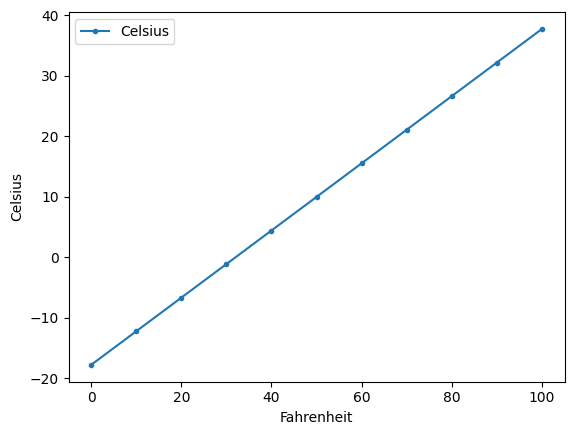

In [40]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part-2 Prediction
#### Corresponding with instructions listed in CC7.6 for Project #7


### Section 1 - Data Acquisition

* I copied ave_hi_nyc*.csv from Deitel's sample data chapter10 folder and placed in in data folder for this project.
* Next step: loading into DataFrame

In [41]:
# Construct the full path to the data file
data_folder_path = os.path.join(os.getcwd(), "data")
sample_file_path = os.path.join(data_folder_path, "ave_hi_nyc_jan_1895-2018.csv")
nyc_df = pd.read_csv(sample_file_path)

### Section 2 - Data Inspection
* Examining NYC data from above by head() and tail()

In [42]:
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [43]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning
1. For readability, rename the 'Value' column as 'Temperature'

In [44]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


2. Check the column's type

In [45]:
nyc_df.Date.dtype

dtype('int64')

3. Continue the 'Data Cleaning' process: Perform 'integer division' of the Date field by 100 to get the year.

In [46]:
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics
#### Obtaining quick Descriptive Statistics to obtain: number of counts, min, max, standard deviation, the mean, 25-percentile, 50-percentile and 75-percentile


In [47]:
pd.set_option('display.precision', 2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model
#### use stats.linregress() to calculate slope and intercept

In [48]:
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)
my_slope = linear_regression.slope
my_intercept = linear_regression.intercept

print(f"Calculated slope is: {my_slope}, intercept is:{my_intercept}")

Calculated slope is: 0.014771361132966163, intercept is:8.694993233674289


### Section 6 - Predict
#### calculate 'prediction for 2024' by: slope*2024 + intercept

In [49]:
my_prediction = my_slope * 2024 + my_intercept

print(f"Calculated prediction for 2024 is: {my_prediction}")

Calculated prediction for 2024 is: 38.5922281667978


### Section 7 - Visualization

In [ ]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10,70)